# Chapter 4 - Training Models - Stansbury's Coding Examples



## Demonstration Setup

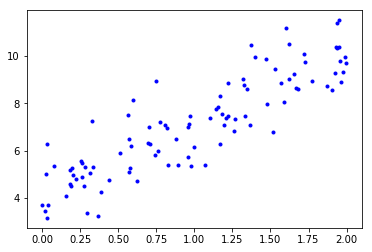

In [48]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [49]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

## Linear Regression - Closed-Form Solution

Theta (i=1): [[4.1538492 ]
 [2.98260128]]


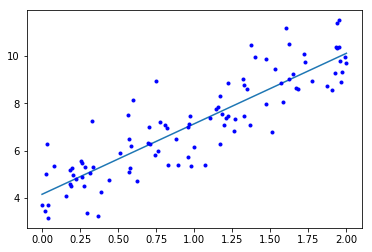

In [50]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

In [51]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print(y_predict)

[[ 4.1538492 ]
 [ 5.64514984]
 [ 7.13645048]
 [ 8.62775112]
 [10.11905176]]


In [52]:
#####################################################################
#####################################################################

## Linear Regression using Scikit-Learn

Theta (i=1): [array([4.1538492]), array([[2.98260128]])]


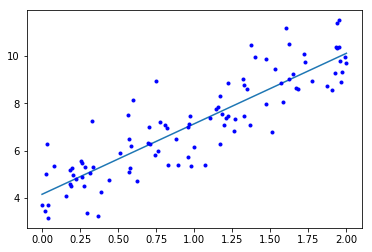

In [53]:
from sklearn.linear_model import LinearRegression
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

In [54]:
# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[ 4.1538492 ]
 [ 5.64514984]
 [ 7.13645048]
 [ 8.62775112]
 [10.11905176]]


In [55]:
#####################################################################
#####################################################################

## Batch Linear Regression

Theta (i=1): [[ 1.25411551]
 [-0.66986235]]
Theta (i=1): [[2.56114424]
 [0.90549264]]
Theta (i=2): [[3.29316732]
 [1.79016199]]
Theta (i=3): [[3.70267803]
 [2.28735493]]
Theta (i=4): [[3.9313123 ]
 [2.56715922]]
Theta (i=5): [[4.05852015]
 [2.72498748]]
Theta (i=6): [[4.12886816]
 [2.81436291]]
Theta (i=7): [[4.16735493]
 [2.86531063]]
Theta (i=8): [[4.18800239]
 [2.89467435]]
Theta (i=9): [[4.19867503]
 [2.91190357]]
Theta (i=10): [[4.20378339]
 [2.92229997]]
Theta (i=11): [[4.2058005 ]
 [2.92883842]]
Theta (i=12): [[4.20611261]
 [2.93318856]]
Theta (i=13): [[4.20549633]
 [2.93628779]]
Theta (i=14): [[4.20438635]
 [2.93866278]]
Theta (i=15): [[4.20302559]
 [2.9406097 ]]
Theta (i=16): [[4.20154942]
 [2.94229547]]
Theta (i=17): [[4.2000329 ]
 [2.94381442]]


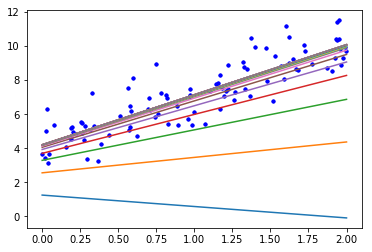

In [56]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)
    
                
    

In [57]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.2000329 ]
 [ 5.67194011]
 [ 7.14384732]
 [ 8.61575453]
 [10.08766174]]


In [58]:
#####################################################################
#####################################################################

## Stochastic Gradient Descent

In [59]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[2.38366628]
 [0.59201398]]
Theta (i=1): [[4.21873773]
 [2.82153826]]
Theta (i=2): [[4.38683511]
 [2.66975139]]
Theta (i=3): [[4.38820322]
 [2.77764154]]
Theta (i=4): [[4.42666995]
 [2.9285989 ]]
Theta (i=5): [[4.47167843]
 [3.1346956 ]]
Theta (i=6): [[4.15270246]
 [2.85059166]]
Theta (i=7): [[4.17896203]
 [2.90691228]]
Theta (i=8): [[4.16185452]
 [3.04343449]]
Theta (i=9): [[4.1276838 ]
 [3.08806363]]
Theta (i=10): [[4.10789706]
 [3.01141045]]
Theta (i=11): [[4.11220575]
 [3.00320678]]
Theta (i=12): [[4.16399276]
 [3.03376622]]
Theta (i=13): [[4.20405874]
 [3.05062959]]
Theta (i=14): [[4.20502244]
 [3.00567776]]
Theta (i=15): [[4.18825057]
 [2.94543643]]
Theta (i=16): [[4.25784608]
 [2.99776836]]
Theta (i=17): [[4.21915857]
 [2.98316879]]
Theta (i=18): [[4.21271436]
 [3.02765994]]
Theta (i=19): [[4.16829262]
 [2.95390077]]
Theta (i=20): [[4.19555456]
 [2.94503939]]
Theta (i=21): [[4.1494193 ]
 [2.92969288]]
Theta (i=22): [[4.17652122]
 [2.94895195]]
Theta (i=23): [[4.234

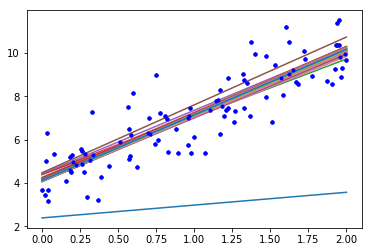

In [60]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [61]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.11465251]
 [ 5.62852169]
 [ 7.14239086]
 [ 8.65626003]
 [10.1701292 ]]


## Mini-Batch Gradient Descent

In [62]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-0.92613577]
 [-0.39745621]]
Theta (i=1): [[3.99442849]
 [3.04451317]]
Theta (i=2): [[4.02496224]
 [3.1183186 ]]
Theta (i=3): [[4.09315193]
 [3.08730568]]
Theta (i=4): [[4.13615595]
 [3.06457722]]
Theta (i=5): [[4.19704614]
 [3.09197719]]
Theta (i=6): [[4.067707 ]
 [2.9442551]]
Theta (i=7): [[4.15082457]
 [2.98940884]]
Theta (i=8): [[4.1524097 ]
 [2.96732823]]
Theta (i=9): [[4.15433508]
 [2.94286043]]
Theta (i=10): [[4.1744319 ]
 [2.97364731]]
Theta (i=11): [[4.17473422]
 [2.99110433]]
Theta (i=12): [[4.17815147]
 [2.98638611]]
Theta (i=13): [[4.15980305]
 [2.96562521]]
Theta (i=14): [[4.15862935]
 [2.94500882]]
Theta (i=15): [[4.17265116]
 [2.97278396]]
Theta (i=16): [[4.15759713]
 [2.95343565]]
Theta (i=17): [[4.13655028]
 [2.95509468]]
Theta (i=18): [[4.16828506]
 [3.01289188]]
Theta (i=19): [[4.15077283]
 [3.00146107]]
Theta (i=20): [[4.12727403]
 [2.97884358]]
Theta (i=21): [[4.14973256]
 [3.01565758]]
Theta (i=22): [[4.11424243]
 [2.9839914 ]]
Theta (i=23): [[4.111

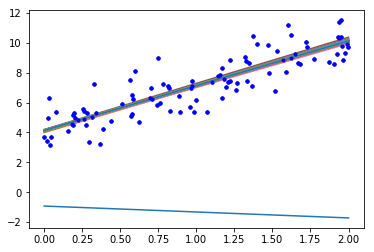

In [63]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [64]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.14263573]
 [ 5.64151163]
 [ 7.14038754]
 [ 8.63926344]
 [10.13813934]]


In [65]:
#####################################################################
#####################################################################

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [66]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline 

boston_housing_data = datasets.load_boston()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A85C1A1BE0>,
      dtype=object)

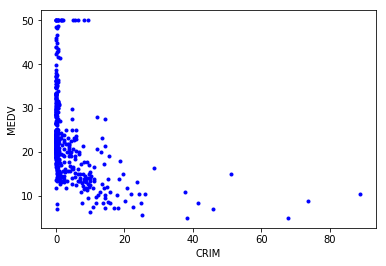

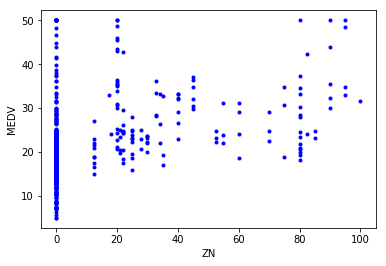

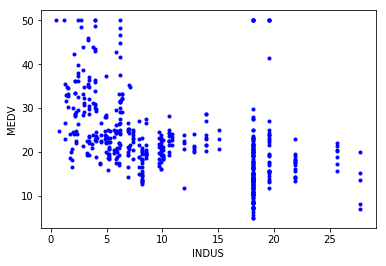

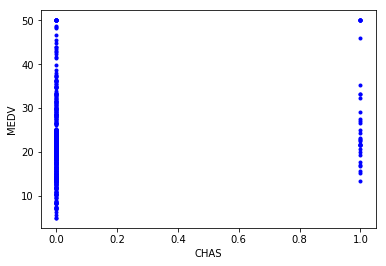

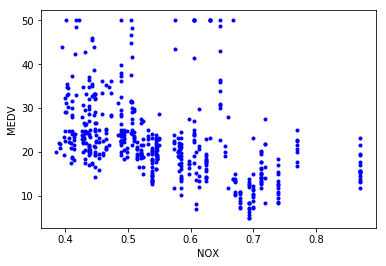

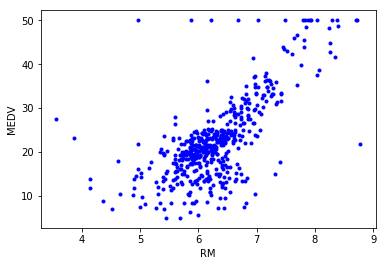

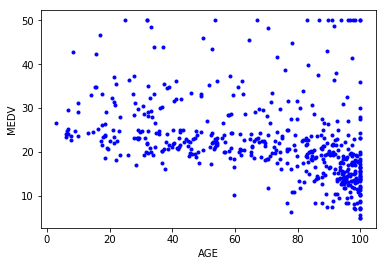

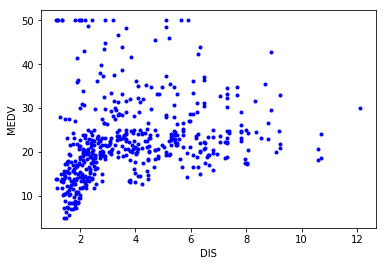

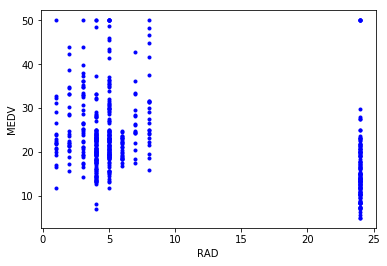

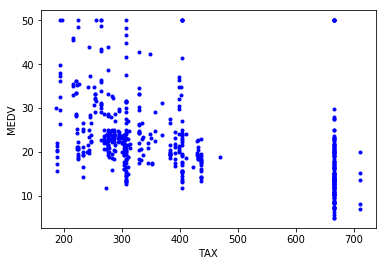

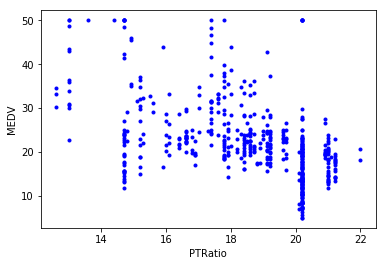

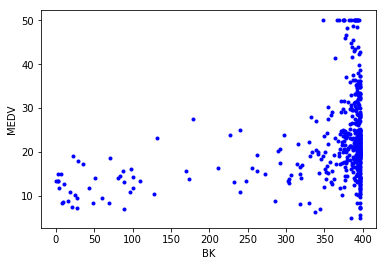

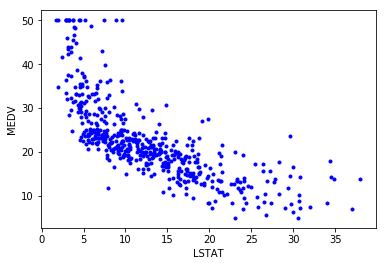

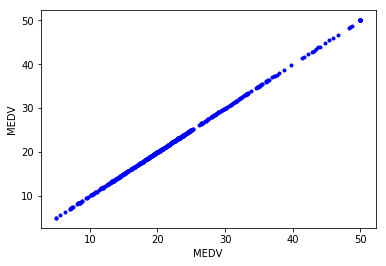

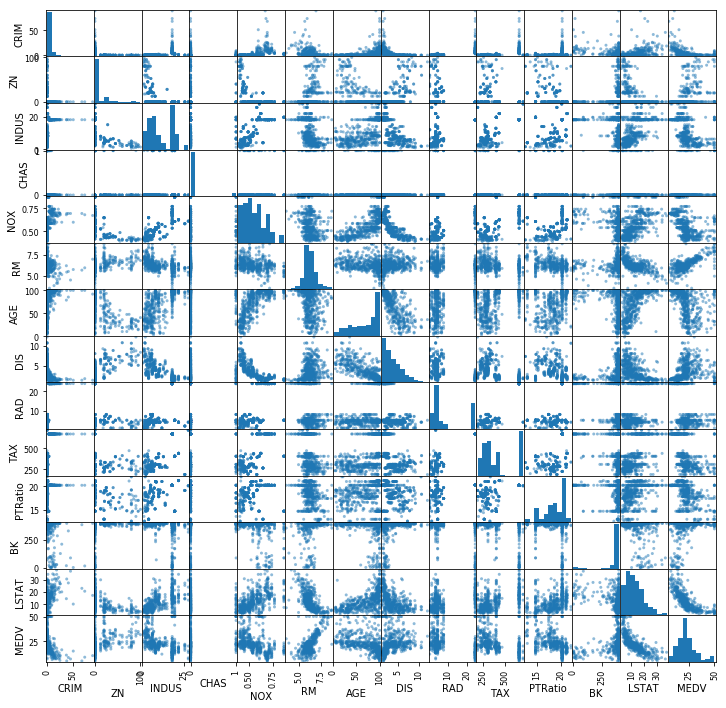

In [67]:
# Attempt to visualize data
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

for column in boston_df.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

22.8238920298745 [-1.00519766e-01  4.14545284e-02  5.36562528e-02  3.98052926e+00
 -1.33780339e+01  4.92202478e+00 -2.50018122e-02 -1.39011723e+00
  2.24778349e-01 -9.34119507e-03 -8.05702293e-01  1.15749728e-02
 -4.40470139e-01]


3.4279386097663243

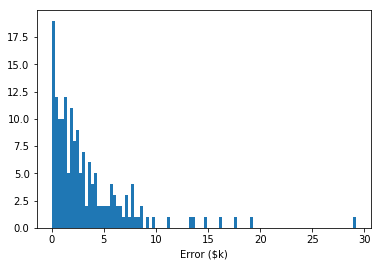

In [68]:
train_X, test_X, train_y, test_y = train_test_split(boston_housing_data.data,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

-5.388713594369335 [ 2.71967632e-03  5.60751754e+00 -6.07465779e-01]


3.841099449152069

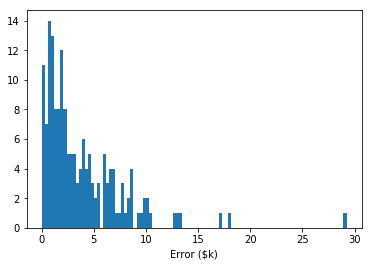

In [69]:
attributes = ["AGE","RM","LSTAT"]
boston_data_set = boston_df[attributes].values

train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

38.13512565634706 [ -9.6518367    4.09303738   0.24152029   2.34248665 -15.28980442
  33.75984477  -1.1522553  -15.84681935   7.41306964  -9.35646723
 -21.58206065   1.98542515 -17.98018813]


3.540274932352768

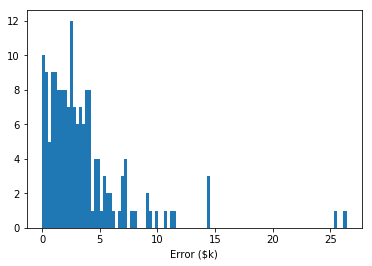

In [70]:
from sklearn.preprocessing import normalize

boston_data_set = normalize(boston_housing_data.data, axis=0, norm='max')


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

22.84513084407059 [-0.93919997  1.27853316  0.16048603  1.05473932 -2.07515812  2.83322074
 -0.11481131 -3.12620793  1.9328727  -1.22184771 -2.06659614  0.80131393
 -3.54416565]


3.20425829738562

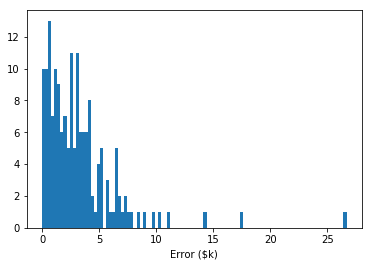

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

boston_data_set = scaler.fit_transform(boston_housing_data.data)


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)